<a href="https://colab.research.google.com/github/AdityaIngale29/SOC/blob/main/3_(Loan_Prediction_KNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import files

uploaded=files.upload()

Saving madfhantr.csv to madfhantr.csv


In [ ]:
df=pd.read_csv(io.BytesIO(uploaded['madfhantr.csv']))
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df_1=df

In [ ]:
df_1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df_1=df_1.dropna()
df_1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


**Dropping Loan_Amount_Term column will get us more rows. Also dependence of that column on predicting Loan_Status is less than 0.1%, hence it is dropped**

In [ ]:
df=df.drop(columns=['Loan_Amount_Term'])

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df=df.dropna()

In [ ]:
df=df.drop(columns=['Loan_ID'])

In [ ]:
df['Dependents']=df['Dependents'].replace(['3+'],['3'])

In [ ]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,1.0,Rural,Y
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,1.0,Urban,Y


In [ ]:
gn=pd.get_dummies(df['Gender'],drop_first=True)

In [ ]:
mr=pd.get_dummies(df['Married'],drop_first=True)
mr=mr.rename(columns={'Yes':'MR-Yes'})

In [ ]:
edu=pd.get_dummies(df.Education,drop_first=True)

In [ ]:
sf=pd.get_dummies(df['Self_Employed'],drop_first=True)
sf=sf.rename(columns={'Yes':'SF-Yes'})

In [ ]:
pa=pd.get_dummies(df['Property_Area'],drop_first=True)

In [ ]:
ls=pd.get_dummies(df['Loan_Status'],drop_first=True)

In [ ]:
df=pd.concat([df,gn,mr,edu,sf,pa,ls],axis=1)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status,Male,MR-Yes,Not Graduate,SF-Yes,Semiurban,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,1.0,Rural,N,1,1,0,0,0,0,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,1.0,Urban,Y,1,1,0,1,0,1,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,1.0,Urban,Y,1,1,1,0,0,1,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,1.0,Urban,Y,1,0,0,0,0,1,1
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,1.0,Urban,Y,1,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,1.0,Rural,Y,0,0,0,0,0,0,1
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,1.0,Rural,Y,1,1,0,0,0,0,1
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,1.0,Urban,Y,1,1,0,0,0,1,1
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,1.0,Urban,Y,1,1,0,0,0,1,1


In [ ]:
df.drop(['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status'],axis=1,inplace=True)
df

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Male,MR-Yes,Not Graduate,SF-Yes,Semiurban,Urban,Y
1,1,4583,1508.0,128.0,1.0,1,1,0,0,0,0,0
2,0,3000,0.0,66.0,1.0,1,1,0,1,0,1,1
3,0,2583,2358.0,120.0,1.0,1,1,1,0,0,1,1
4,0,6000,0.0,141.0,1.0,1,0,0,0,0,1,1
5,2,5417,4196.0,267.0,1.0,1,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,1.0,0,0,0,0,0,0,1
610,3,4106,0.0,40.0,1.0,1,1,0,0,0,0,1
611,1,8072,240.0,253.0,1.0,1,1,0,0,0,1,1
612,2,7583,0.0,187.0,1.0,1,1,0,0,0,1,1


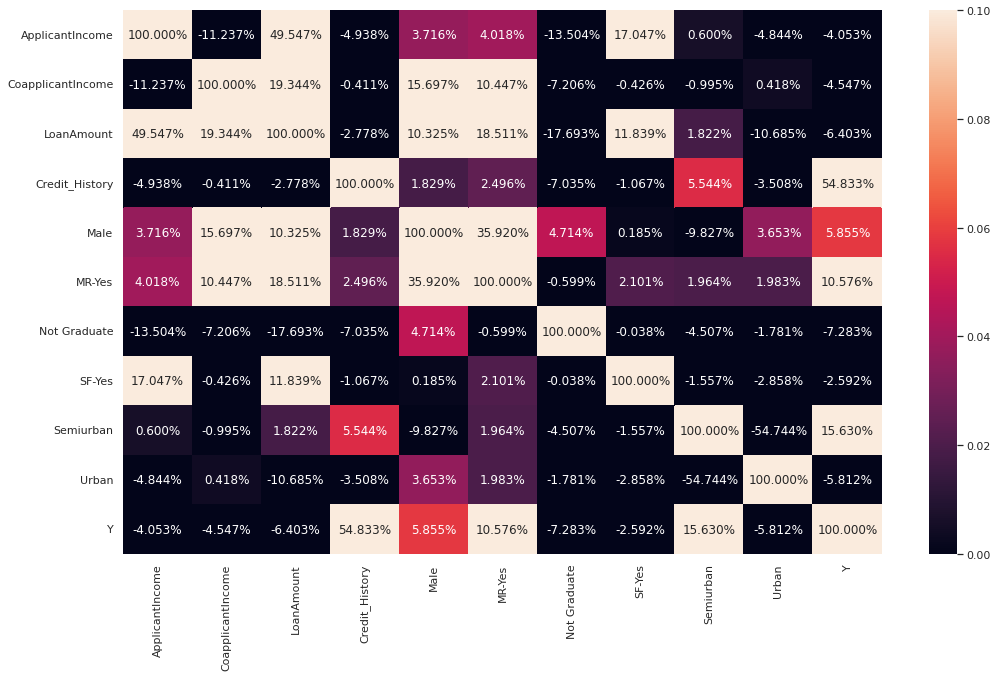

In [ ]:
sns.set(rc = {'figure.figsize':(17,10)})  #This allows to change the size of the figure
sns.heatmap(df.corr(),annot=True,vmin=0,vmax=0.1,fmt='.3%')

In [ ]:
X=df.iloc[:,:-1]
y=ls

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.05,random_state=0)

In [ ]:
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [ ]:
model=KNeighborsClassifier(n_neighbors=7,p=2,metric='euclidean')
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [ ]:
y_pred=model.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1], dtype=uint8)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[ 4,  3],
       [ 3, 15]])

In [ ]:
f1_score(y_test,y_pred)

0.8333333333333334

In [ ]:
accuracy_score(y_test,y_pred)*100

76.0

**Accuracy has increased to 76%**